#### Step 01: Introduction

##### Objective:
Predict medical insurance claim amounts (charges) using personal features like age, BMI, smoking status, gender, children, and region.

Dataset Overview:
- Columns: age, sex, bmi, children, smoker, region, charges
- Target Variable: charges

Feature Types:
- Numeric: age, bmi, children
- Categorical: sex, smoker, region

#### Step 02: Load Dataset

In [18]:
import pandas as pd

# Load dataset
df = pd.read_csv('insurance.csv')

# Check first 5 rows
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


#### Step 03: Basic Exploration

In [19]:
# Dataset info
print(df.info())

# Basic statistics
print(df.describe())

# Unique values for categorical columns
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

This shows data types, missing values, and basic distributions.

#### Step 04: Preprocessing & Encoding

Purpose:
Convert categorical variables into numerical form so they can be used by the Linear Regression model, then split the data into features and target.

In [20]:
# Automatically detect categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Step 05: Train the Linear Regression Model

Purpose:
Train a Linear Regression model using the preprocessed training data and generate predictions on the test set.

In [25]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)


#### Step 06: Model Evaluation

Purpose:
Evaluate how well the Linear Regression model predicts insurance charges using MAE and RMSE.

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# MAE
mae = mean_absolute_error(y_test, y_pred)

# RMSE (manual square root)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 4181.19447375365
Root Mean Squared Error (RMSE): 5796.284659276273


#### Step 07: Feature Impact Visualization

Purpose:
Visualize how age, BMI, and smoking status impact medical insurance charges.

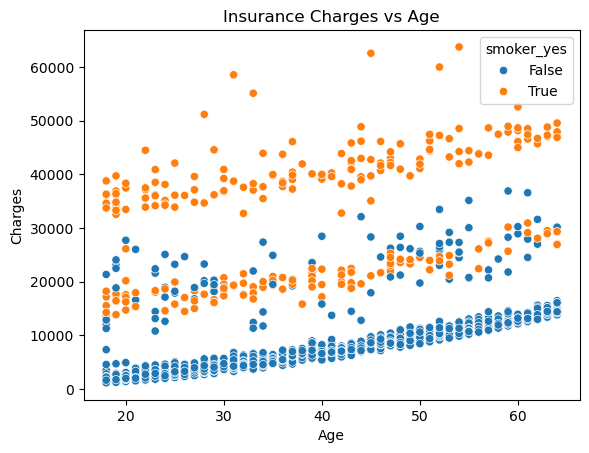

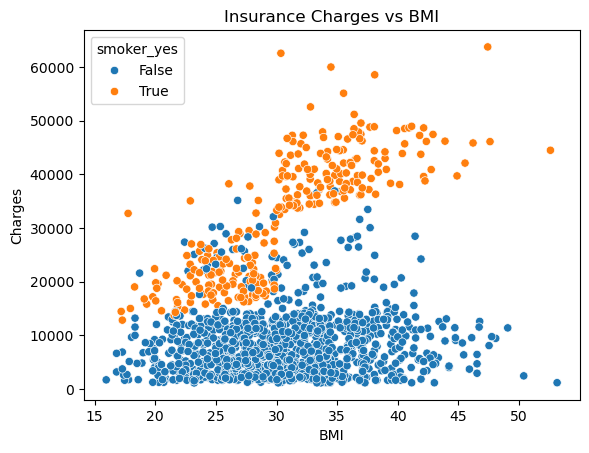

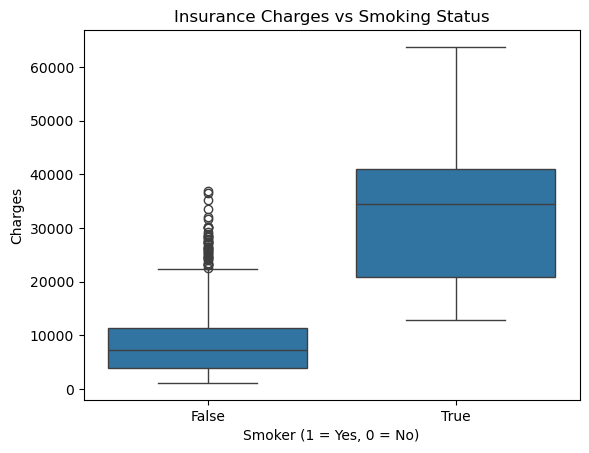

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Charges vs Age
sns.scatterplot(x='age', y='charges', hue='smoker_yes', data=df)
plt.title('Insurance Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Charges vs BMI
sns.scatterplot(x='bmi', y='charges', hue='smoker_yes', data=df)
plt.title('Insurance Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Charges vs Smoking Status
sns.boxplot(x='smoker_yes', y='charges', data=df)
plt.title('Insurance Charges vs Smoking Status')
plt.xlabel('Smoker (1 = Yes, 0 = No)')
plt.ylabel('Charges')
plt.show()


The Linear Regression model successfully predicts insurance charges.
Smoking status, BMI, and age have the strongest impact on medical costs.
Model performance was evaluated using MAE and RMSE.

#### Step 08: Conclusion

The Linear Regression model successfully predicts insurance charges.
Smoking status, BMI, and age have the strongest impact on medical costs.
Model performance was evaluated using MAE and RMSE.